In [1]:
pip show numpy

Name: numpy
Version: 1.24.3
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /Users/michael/anaconda3/lib/python3.11/site-packages
Requires: 
Required-by: altair, astropy, bokeh, Bottleneck, contourpy, datashader, gensim, h5py, holoviews, hvplot, imagecodecs, imageio, imbalanced-learn, matplotlib, mglearn, numba, numexpr, pandas, patsy, pyarrow, pydeck, pyerfa, pywavelets, scikit-image, scikit-learn, scipy, seaborn, statsmodels, streamlit, tables, tifffile, xarray
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def generate_data(num_surgeries, num_rooms, num_surgeons):

    surgeries = {
        "Surgery_ID": [f"S{i}" for i in range(1, num_surgeries + 1)],
        "Duration": [random.randint(30, 180) for _ in range(num_surgeries)],  
        "Priority": [random.choice(["Low", "Medium", "High"]) for _ in range(num_surgeries)], 
        "Post_Time": [],  
        "Recovery_Time": []
    }

  
    for priority in surgeries["Priority"]:
        if priority == "High":
            surgeries["Post_Time"].append(random.randint(30, 60))  
            surgeries["Recovery_Time"].append(random.randint(30, 120))  
        elif priority == "Medium":
            surgeries["Post_Time"].append(random.randint(15, 45))  
            surgeries["Recovery_Time"].append(random.randint(20, 80))  
        elif priority == "Low":
            surgeries["Post_Time"].append(random.randint(5, 15))  
            surgeries["Recovery_Time"].append(random.randint(5, 15))  

    df_surgeries = pd.DataFrame(surgeries)
    
    operating_rooms = {
        "Room_ID": [f"R{i}" for i in range(1, num_rooms + 1)],
        "Available_Time": [600 for _ in range(num_rooms)]
    }
    df_operating_rooms = pd.DataFrame(operating_rooms)

   
    surgeons = {
        "Surgeon_ID": [f"SG{i}" for i in range(1, num_surgeons + 1)],
        "Available_Time": [600 for _ in range(num_surgeons)]  
    }
    df_surgeons = pd.DataFrame(surgeons)

    return df_surgeries, df_operating_rooms, df_surgeons


df_surgeries, df_operating_rooms, df_surgeons = generate_data(num_surgeries=5, num_rooms=2, num_surgeons=3)


print("\nSurgeries DataFrame:\n", df_surgeries)
print("\nOperating Rooms DataFrame:\n", df_operating_rooms)
print("\nSurgeons DataFrame:\n", df_surgeons)


Surgeries DataFrame:
   Surgery_ID  Duration Priority  Post_Time  Recovery_Time
0         S1        39     High         48            108
1         S2       166   Medium         32             65
2         S3        84     High         33            104
3         S4       134     High         50             33
4         S5        90      Low          7             14

Operating Rooms DataFrame:
   Room_ID  Available_Time
0      R1             600
1      R2             600

Surgeons DataFrame:
   Surgeon_ID  Available_Time
0        SG1             600
1        SG2             600
2        SG3             600


In [83]:
NUM_ANTS = 10
NUM_ITERATIONS = 100
PHEROMONE_DECAY = 0.1
ALPHA = 1  # Pheromone influence
BETA = 2   # Heuristic influence

In [84]:
def initialize_pheromones(num_surgeries, num_assignments):
    pheromones = np.ones((num_surgeries, num_assignments))
    print("\nInitialized Pheromone Matrix:")
    print(pd.DataFrame(pheromones)) 
    return pheromones


#row is number of surgeries and number of assighments is all possible room-surgeon combinations
#number of assignments is calculated number of rooms * number of surgeons. 

In [85]:
# Initialize heuristic matrix based on surgery priorities and durations
def initialize_heuristics(df_surgeries, num_assignments):
    priority_weight = {"High": 7, "Medium": 4, "Low": 2}
    surgery_heuristics = np.array([
        priority_weight[row["Priority"]] / row["Duration"]
        for _, row in df_surgeries.iterrows()
    ])
    heuristics_matrix = np.tile(surgery_heuristics, (num_assignments, 1)).T

    print("\nHeuristic Values for Surgeries:")
    for surgery, heuristic in zip(df_surgeries["Surgery_ID"], surgery_heuristics):
        print(f"Surgery {surgery}: {heuristic:.4f}")

    print("\nHeuristics Matrix:")
    print(pd.DataFrame(heuristics_matrix))  # Display as a table

    return heuristics_matrix


example. Heuristic per surgery:
Heuristic Value
=
Priority Weight
Duration
Heuristic Value= 
Duration
Priority Weight
​
 
Example:
Priority = "High" (weight = 3).
Duration = 60 minutes.

Heuristic Value= 
3 / 60
 =0.05
 
 creating a matrix of just heuristic on rooms and surgeon
 

In [86]:
def visualize_pheromones(pheromones):
    plt.figure(figsize=(10, 6))
    sns.heatmap(pheromones, annot=True, cmap="YlGnBu")
    plt.title("Pheromone Levels")
    plt.xlabel("Assignments")
    plt.ylabel("Surgeries")
    plt.show()


In [87]:
def visualize_heuristics(heuristics_matrix):
    plt.figure(figsize=(10, 6))
    sns.heatmap(heuristics_matrix, annot=True, cmap="YlOrRd")
    plt.title("Heuristics Matrix")
    plt.xlabel("Assignments")
    plt.ylabel("Surgeries")
    plt.show()


In [88]:
num_surgeries = 5
num_rooms = 2
num_surgeons = 3
num_assignments = num_rooms * num_surgeons


In [89]:
df_surgeries = pd.DataFrame({
    "Surgery_ID": [f"S{i}" for i in range(1, num_surgeries + 1)],
    "Duration": [30, 60, 90, 120, 150],
    "Priority": ["High", "Medium", "Low", "Medium", "High"]
})


Initialized Pheromone Matrix:
     0    1    2    3    4    5
0  1.0  1.0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0  1.0  1.0


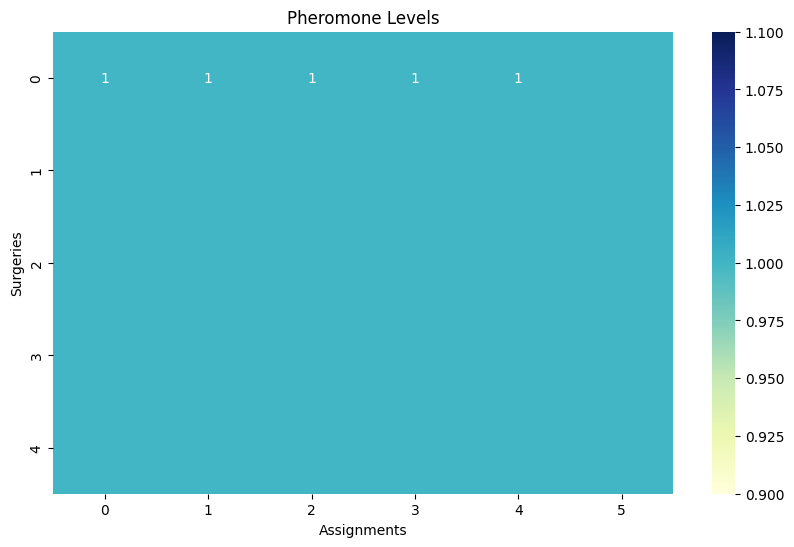


Heuristic Values for Surgeries:
Surgery S1: 0.2333
Surgery S2: 0.0667
Surgery S3: 0.0222
Surgery S4: 0.0333
Surgery S5: 0.0467

Heuristics Matrix:
          0         1         2         3         4         5
0  0.233333  0.233333  0.233333  0.233333  0.233333  0.233333
1  0.066667  0.066667  0.066667  0.066667  0.066667  0.066667
2  0.022222  0.022222  0.022222  0.022222  0.022222  0.022222
3  0.033333  0.033333  0.033333  0.033333  0.033333  0.033333
4  0.046667  0.046667  0.046667  0.046667  0.046667  0.046667


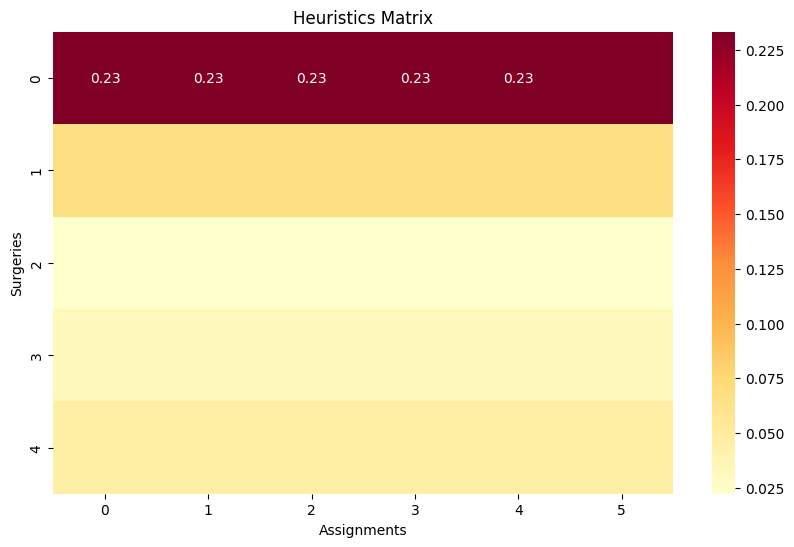

In [90]:
pheromones = initialize_pheromones(num_surgeries, num_assignments)
visualize_pheromones(pheromones)

heuristics = initialize_heuristics(df_surgeries, num_assignments)
visualize_heuristics(heuristics)


In [13]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Parameters
NUM_ANTS = 10
NUM_ITERATIONS = 10
PHEROMONE_DECAY = 0.1
ALPHA = 1  # Pheromone influence
BETA = 2   # Heuristic influence


def generate_data(num_surgeries, num_rooms, num_surgeons):
    surgeries = {
        "Surgery_ID": [f"S{i}" for i in range(1, num_surgeries + 1)],
        "Duration": [],
        "Priority": [random.choice(["Low", "Medium", "High"]) for _ in range(num_surgeries)], 
        "Post_Time": [],  
        "Recovery_Time": []
    }

    for priority in surgeries["Priority"]:
        
        if priority == "High":
            surgeries["Duration"].append(random.randint(60, 180))  
            surgeries["Post_Time"].append(random.randint(15, 30))
            surgeries["Recovery_Time"].append(random.randint(15, 30))
        elif priority == "Medium":
            surgeries["Duration"].append(random.randint(45, 120))  
            surgeries["Post_Time"].append(random.randint(10, 20))
            surgeries["Recovery_Time"].append(random.randint(10, 20))
        elif priority == "Low":
            surgeries["Duration"].append(random.randint(5, 30))  
            surgeries["Post_Time"].append(random.randint(5, 10))
            surgeries["Recovery_Time"].append(random.randint(5, 10))

    df_surgeries = pd.DataFrame(surgeries)
    
    operating_rooms = {
        "Room_ID": [f"R{i}" for i in range(1, num_rooms + 1)],
        "Available_Time": [600 for _ in range(num_rooms)]
    }
    df_operating_rooms = pd.DataFrame(operating_rooms)

    surgeons = {
        "Surgeon_ID": [f"SG{i}" for i in range(1, num_surgeons + 1)],
        "Available_Time": [600 for _ in range(num_surgeons)]  
    }
    df_surgeons = pd.DataFrame(surgeons)

    return df_surgeries, df_operating_rooms, df_surgeons

# Initialize pheromones
def initialize_pheromones(num_surgeries, num_assignments):
    return np.ones((num_surgeries, num_assignments))

# Initialize heuristics
def initialize_heuristics(df_surgeries, num_assignments):
    priority_weight = {"High": 7, "Medium": 4, "Low": 2}
    surgery_heuristics = np.array([
        priority_weight[row["Priority"]] / row["Duration"]
        for _, row in df_surgeries.iterrows()
    ])
    heuristics_matrix = np.tile(surgery_heuristics, (num_assignments, 1)).T
    return heuristics_matrix

def generate_emergency_surgery(surgery_id):
    return {
        "Surgery_ID": surgery_id,
        "Duration": random.randint(30, 120),  
        "Priority": "Emergency",
        "Post_Time": 0, 
        "Recovery_Time": random.randint(5, 10)  
    }

# Calculate probabilities
def calculate_probabilities(pheromones, heuristics_matrix, surgery_index, alpha, beta):
    pheromones_row = pheromones[surgery_index]
    heuristics_row = heuristics_matrix[surgery_index]
    combined = (pheromones_row ** alpha) * (heuristics_row ** beta)
    probabilities = combined / np.sum(combined)
    return probabilities

# Modified build_schedule to handle emergency surgeries
def build_schedule_with_emergencies(df_surgeries, df_operating_rooms, df_surgeons, pheromones, heuristics, emergency_surgeries):
    schedule = []
    available_rooms = {room: 600 for room in df_operating_rooms["Room_ID"]}
    available_surgeons = {surgeon: 600 for surgeon in df_surgeons["Surgeon_ID"]}

    # Add emergency surgeries first
    for emergency in emergency_surgeries:
        for room, surgeon in zip(available_rooms.keys(), available_surgeons.keys()):
            surgery_time = emergency["Duration"] + emergency["Post_Time"] + emergency["Recovery_Time"]
            if available_rooms[room] >= surgery_time and available_surgeons[surgeon] >= surgery_time:
                start_time = 600 - available_rooms[room]
                end_time = start_time + emergency["Duration"]
                schedule.append({
                    "Surgery_ID": emergency["Surgery_ID"],
                    "Assigned_Room": room,
                    "Assigned_Surgeon": surgeon,
                    "Start_Time": start_time,
                    "End_Time": end_time
                })
                available_rooms[room] -= surgery_time
                available_surgeons[surgeon] -= surgery_time
                break  # Move to the next emergency surgery

    # Schedule regular surgeries
    unscheduled_due_to_room = []
    unscheduled_due_to_surgeon = []
    for surgery_index, surgery in df_surgeries.iterrows():
        probabilities = calculate_probabilities(pheromones, heuristics, surgery_index, ALPHA, BETA)
        assignment_index = np.random.choice(len(probabilities), p=probabilities)
        room = df_operating_rooms.iloc[assignment_index % len(available_rooms)]["Room_ID"]
        surgeon = df_surgeons.iloc[assignment_index // len(available_rooms)]["Surgeon_ID"]
        surgery_time = surgery["Duration"] + surgery["Post_Time"] + surgery["Recovery_Time"]
        
        if available_rooms[room] >= surgery_time and available_surgeons[surgeon] >= surgery_time:
            start_time = 600 - available_rooms[room]
            end_time = start_time + surgery["Duration"]
            schedule.append({
                "Surgery_ID": surgery["Surgery_ID"],
                "Assigned_Room": room,
                "Assigned_Surgeon": surgeon,
                "Start_Time": start_time,
                "End_Time": end_time
            })
            available_rooms[room] -= surgery_time
            available_surgeons[surgeon] -= surgery_time
        else:
            if available_rooms[room] < surgery_time:
                unscheduled_due_to_room.append(surgery["Surgery_ID"])
            if available_surgeons[surgeon] < surgery_time:
                unscheduled_due_to_surgeon.append(surgery["Surgery_ID"])

    return schedule, available_rooms, available_surgeons, unscheduled_due_to_room, unscheduled_due_to_surgeon
# Evaluate fitness
def evaluate_fitness(schedule, df_surgeries, emergency_surgeries):
    fitness = 0
    max_fitness = 0

    # Calculate fitness for scheduled surgeries
    for assignment in schedule:
        surgery_id = assignment["Surgery_ID"]

        if surgery_id.startswith("E"):  # Emergency surgery
            contribution = 10  # Higher contribution for emergencies
        else:
            surgery_priority = df_surgeries.loc[df_surgeries["Surgery_ID"] == surgery_id, "Priority"].values[0]
            if surgery_priority == "High":
                contribution = 7
            elif surgery_priority == "Medium":
                contribution = 4
            elif surgery_priority == "Low":
                contribution = 2

        fitness += contribution

    # Calculate maximum possible fitness
    for _, row in df_surgeries.iterrows():
        if row["Priority"] == "High":
            max_fitness += 7
        elif row["Priority"] == "Medium":
            max_fitness += 4
        elif row["Priority"] == "Low":
            max_fitness += 2

    for emergency in emergency_surgeries:
        max_fitness += 10  # Maximum possible contribution for emergencies

    # Calculate penalty for unscheduled surgeries
    penalty = 0
    unscheduled_emergencies = [
        e for e in emergency_surgeries if e["Surgery_ID"] not in {assignment["Surgery_ID"] for assignment in schedule}
    ]
    for _ in unscheduled_emergencies:
        penalty += 4  # Lower penalty for unscheduled emergencies

    unscheduled_regulars = df_surgeries[~df_surgeries["Surgery_ID"].isin({assignment["Surgery_ID"] for assignment in schedule})]
    for _, row in unscheduled_regulars.iterrows():
        if row["Priority"] == "High":
            penalty += 5
        elif row["Priority"] == "Medium":
            penalty += 2
        elif row["Priority"] == "Low":
            penalty += 1

    # Subtract penalty from fitness
    fitness -= penalty

    # Calculate fitness percentage
    fitness_percentage = (fitness / max_fitness) * 100 if max_fitness > 0 else 0

    return fitness, fitness_percentage
# Update pheromones
def update_pheromones(pheromones, schedules, fitness_values, decay):
    for i in range(len(pheromones)):
        pheromones[i] *= (1 - decay)
        for j, schedule in enumerate(schedules):
            if i in schedule:
                pheromones[i] += fitness_values[j]
    return pheromones

def ant_colony_optimization_with_emergencies(df_surgeries, df_operating_rooms, df_surgeons):
    num_surgeries = len(df_surgeries)
    num_assignments = len(df_operating_rooms) * len(df_surgeons)
    pheromones = initialize_pheromones(num_surgeries, num_assignments)
    heuristics = initialize_heuristics(df_surgeries, num_assignments)
    best_schedule = None
    best_fitness = float("-inf")
    best_emergency_surgeries = None
    best_remaining_rooms = None
    best_remaining_surgeons = None
    best_unscheduled_due_to_room = None
    best_unscheduled_due_to_surgeon = None

    for iteration in range(NUM_ITERATIONS):
        #print(f"\n--- Iteration {iteration + 1} ---")  # Display iteration info
        schedules = []
        fitness_values = []

        # Always generate 2-3 emergencies for fairness
        num_emergencies = random.randint(2, 3)
        emergency_surgeries = [
            generate_emergency_surgery(f"E{iteration}_{i}")
            for i in range(num_emergencies)
        ]

        for ant in range(NUM_ANTS):
            schedule, available_rooms, available_surgeons, unscheduled_due_to_room, unscheduled_due_to_surgeon = build_schedule_with_emergencies(
                df_surgeries, df_operating_rooms, df_surgeons,
                pheromones, heuristics, emergency_surgeries
            )
            fitness, _ = evaluate_fitness(schedule, df_surgeries, emergency_surgeries)
            schedules.append(schedule)
            fitness_values.append(fitness)

            # Print only the fitness score for each ant
            #print(f"Ant {ant + 1}: Fitness = {fitness}")

            if fitness > best_fitness:
                best_schedule = schedule
                best_fitness = fitness
                best_emergency_surgeries = emergency_surgeries
                best_remaining_rooms = available_rooms
                best_remaining_surgeons = available_surgeons
                best_unscheduled_due_to_room = unscheduled_due_to_room
                best_unscheduled_due_to_surgeon = unscheduled_due_to_surgeon

        pheromones = update_pheromones(pheromones, schedules, fitness_values, PHEROMONE_DECAY)

    #print("\nBest Unscheduled Due to Room Time:", best_unscheduled_due_to_room)
    #print("Best Unscheduled Due to Surgeon Time:", best_unscheduled_due_to_surgeon)

    return best_schedule, best_fitness, best_emergency_surgeries, best_remaining_rooms, best_remaining_surgeons
# Display the detailed schedule
def display_emergency_schedule(best_schedule, emergency_surgeries, df_surgeries):
    schedule_df = pd.DataFrame(best_schedule)
    detailed_schedule = pd.merge(schedule_df, df_surgeries, on="Surgery_ID", how="left")
    detailed_schedule = detailed_schedule[[
        "Surgery_ID", "Priority", "Duration", "Post_Time", "Recovery_Time",
        "Assigned_Room", "Assigned_Surgeon", "Start_Time", "End_Time"
    ]]
    print("\nDetailed Schedule with Times and Priorities (Including Emergencies):")
    print(detailed_schedule)

    # Print emergency surgeries (from the best iteration)
    print("\nEmergency Surgeries:")
    emergency_df = pd.DataFrame(emergency_surgeries)
    print(emergency_df.to_string(index=False))

    
def get_unscheduled_surgeries(df_surgeries, best_schedule):
    # Extract the Surgery_IDs from the schedule
    scheduled_surgeries = [assignment["Surgery_ID"] for assignment in best_schedule]
    # Identify unscheduled surgeries
    unscheduled_surgeries = df_surgeries[~df_surgeries["Surgery_ID"].isin(scheduled_surgeries)]
    return unscheduled_surgeries
    
    
df_surgeries, df_operating_rooms, df_surgeons = generate_data(40, 8, 12)

# Display the random data with priority levels
print("\nRandomly Generated Surgeries Data:")
print(df_surgeries.to_string(index=False))

print("\nOperating Rooms Data:")
print(df_operating_rooms.to_string(index=False))

print("\nSurgeons Data:")
print(df_surgeons.to_string(index=False))


best_schedule, best_fitness, best_emergency_surgeries, best_remaining_rooms, best_remaining_surgeons = ant_colony_optimization_with_emergencies(
    df_surgeries, df_operating_rooms, df_surgeons
)

# Calculate fitness percentage for the best schedule
_, best_fitness_percentage = evaluate_fitness(best_schedule, df_surgeries, best_emergency_surgeries)

# Display unscheduled surgeries
unscheduled_surgeries = get_unscheduled_surgeries(df_surgeries, best_schedule)
if not unscheduled_surgeries.empty:
    print("\nUnscheduled Surgeries (Not Completed Due to Time Constraints):")
    print(unscheduled_surgeries.to_string(index=False))
else:
    print("\nAll surgeries were successfully scheduled!")

# Display remaining time for rooms and surgeons
print("\nRemaining Time for Rooms:")
for room, time_left in best_remaining_rooms.items():
    print(f"{room}: {time_left} minutes left")

#print("\nRemaining Time for Surgeons:")
for surgeon, time_left in best_remaining_surgeons.items():
    print(f"{surgeon}: {time_left} minutes left")

# Display the best schedule with times and priorities
print("\nBest Fitness (Including Penalties):", best_fitness)
print(f"Fitness Percentage: {best_fitness_percentage:.2f}%")
print("\nDetailed Schedule with Times and Priorities:")
schedule_df = pd.DataFrame(best_schedule)
schedule_with_details = pd.merge(schedule_df, df_surgeries, on="Surgery_ID")
print(schedule_with_details.to_string(index=False))

# Display emergency surgeries and schedule
display_emergency_schedule(best_schedule, best_emergency_surgeries, df_surgeries)



Randomly Generated Surgeries Data:
Surgery_ID  Duration Priority  Post_Time  Recovery_Time
        S1        24      Low          9              5
        S2        12      Low         10              9
        S3       109     High         24             26
        S4        24      Low          9              7
        S5       171     High         24             18
        S6        14      Low          8             10
        S7        93   Medium         14             14
        S8        81   Medium         13             16
        S9        28      Low          9              7
       S10       126     High         16             16
       S11        65     High         15             18
       S12        15      Low          6              6
       S13        13      Low          9              5
       S14        28      Low         10             10
       S15        19      Low          6              7
       S16        29      Low          9             10
       S17  

In [16]:
num_ants_values = [10, 20, 30]
num_iterations_values = [10, 20, 30]
pheromone_decay_values = [0.1, 0.3, 0.5]
alpha_values = [1, 3, 5]
beta_values = [2, 4, 6]


random.seed(42)
np.random.seed(42)


num_surgeries = 40
num_rooms = 8
num_surgeons = 12
df_surgeries, df_operating_rooms, df_surgeons = generate_data(num_surgeries, num_rooms, num_surgeons)

num_runs = 5
results = []


for num_ants in num_ants_values:
    for num_iterations in num_iterations_values:
        for decay in pheromone_decay_values:
            for alpha in alpha_values:
                for beta in beta_values:
                    
                    print(f"Running with parameters: num_ants={num_ants}, num_iterations={num_iterations}, "
                          f"pheromone_decay={decay}, alpha={alpha}, beta={beta}")
                    
                    run_metrics = []

                    for _ in range(num_runs):
                        
                        NUM_ANTS = num_ants
                        NUM_ITERATIONS = num_iterations
                        PHEROMONE_DECAY = decay
                        ALPHA = alpha
                        BETA = beta

                        
                        best_schedule, best_fitness, best_emergency_surgeries, best_remaining_rooms, best_remaining_surgeons = ant_colony_optimization_with_emergencies(
                            df_surgeries, df_operating_rooms, df_surgeons
                        )

                        
                        run_metrics.append({
                            'fitness': best_fitness,
                            'fitness_percentage': evaluate_fitness(best_schedule, df_surgeries, best_emergency_surgeries)[1],
                            'unscheduled_surgeries': len(get_unscheduled_surgeries(df_surgeries, best_schedule)),
                            'remaining_room_time': sum(best_remaining_rooms.values()),
                            'remaining_surgeon_time': sum(best_remaining_surgeons.values())
                        })

                    
                    fitness_values = [m['fitness'] for m in run_metrics]
                    avg_fitness = np.mean(fitness_values)
                    avg_max_fitness = np.max(fitness_values)
                    avg_min_fitness = np.min(fitness_values)
                    avg_fitness_percentage = np.mean([m['fitness_percentage'] for m in run_metrics])
                    avg_unscheduled_surgeries = np.mean([m['unscheduled_surgeries'] for m in run_metrics])
                    avg_remaining_room_time = np.mean([m['remaining_room_time'] for m in run_metrics])
                    avg_remaining_surgeon_time = np.mean([m['remaining_surgeon_time'] for m in run_metrics])

                    
                    results.append({
                        'num_ants': num_ants,
                        'num_iterations': num_iterations,
                        'pheromone_decay': decay,
                        'alpha': alpha,
                        'beta': beta,
                        'avg_fitness': avg_fitness,
                        'avg_max_fitness': avg_max_fitness,
                        'avg_min_fitness': avg_min_fitness,
                        'avg_fitness_percentage': avg_fitness_percentage,
                        'avg_unscheduled_surgeries': avg_unscheduled_surgeries,
                        'avg_remaining_room_time': avg_remaining_room_time,
                        'avg_remaining_surgeon_time': avg_remaining_surgeon_time
                    })


results_df = pd.DataFrame(results)


print("\nFinal Aggregated Results:")
print(results_df.to_string(index=False))

Running with parameters: num_ants=10, num_iterations=10, pheromone_decay=0.1, alpha=1, beta=2
Running with parameters: num_ants=10, num_iterations=10, pheromone_decay=0.1, alpha=1, beta=4
Running with parameters: num_ants=10, num_iterations=10, pheromone_decay=0.1, alpha=1, beta=6
Running with parameters: num_ants=10, num_iterations=10, pheromone_decay=0.1, alpha=3, beta=2
Running with parameters: num_ants=10, num_iterations=10, pheromone_decay=0.1, alpha=3, beta=4
Running with parameters: num_ants=10, num_iterations=10, pheromone_decay=0.1, alpha=3, beta=6
Running with parameters: num_ants=10, num_iterations=10, pheromone_decay=0.1, alpha=5, beta=2
Running with parameters: num_ants=10, num_iterations=10, pheromone_decay=0.1, alpha=5, beta=4
Running with parameters: num_ants=10, num_iterations=10, pheromone_decay=0.1, alpha=5, beta=6
Running with parameters: num_ants=10, num_iterations=10, pheromone_decay=0.3, alpha=1, beta=2
Running with parameters: num_ants=10, num_iterations=10, phe

Running with parameters: num_ants=20, num_iterations=10, pheromone_decay=0.1, alpha=5, beta=4
Running with parameters: num_ants=20, num_iterations=10, pheromone_decay=0.1, alpha=5, beta=6
Running with parameters: num_ants=20, num_iterations=10, pheromone_decay=0.3, alpha=1, beta=2
Running with parameters: num_ants=20, num_iterations=10, pheromone_decay=0.3, alpha=1, beta=4
Running with parameters: num_ants=20, num_iterations=10, pheromone_decay=0.3, alpha=1, beta=6
Running with parameters: num_ants=20, num_iterations=10, pheromone_decay=0.3, alpha=3, beta=2
Running with parameters: num_ants=20, num_iterations=10, pheromone_decay=0.3, alpha=3, beta=4
Running with parameters: num_ants=20, num_iterations=10, pheromone_decay=0.3, alpha=3, beta=6
Running with parameters: num_ants=20, num_iterations=10, pheromone_decay=0.3, alpha=5, beta=2
Running with parameters: num_ants=20, num_iterations=10, pheromone_decay=0.3, alpha=5, beta=4
Running with parameters: num_ants=20, num_iterations=10, phe

Running with parameters: num_ants=30, num_iterations=10, pheromone_decay=0.3, alpha=3, beta=6
Running with parameters: num_ants=30, num_iterations=10, pheromone_decay=0.3, alpha=5, beta=2
Running with parameters: num_ants=30, num_iterations=10, pheromone_decay=0.3, alpha=5, beta=4
Running with parameters: num_ants=30, num_iterations=10, pheromone_decay=0.3, alpha=5, beta=6
Running with parameters: num_ants=30, num_iterations=10, pheromone_decay=0.5, alpha=1, beta=2
Running with parameters: num_ants=30, num_iterations=10, pheromone_decay=0.5, alpha=1, beta=4
Running with parameters: num_ants=30, num_iterations=10, pheromone_decay=0.5, alpha=1, beta=6
Running with parameters: num_ants=30, num_iterations=10, pheromone_decay=0.5, alpha=3, beta=2
Running with parameters: num_ants=30, num_iterations=10, pheromone_decay=0.5, alpha=3, beta=4
Running with parameters: num_ants=30, num_iterations=10, pheromone_decay=0.5, alpha=3, beta=6
Running with parameters: num_ants=30, num_iterations=10, phe

In [19]:
results_df.to_csv("ant_colony_results.csv", index=False)
print("Results saved to ant_colony_results.csv.")


Results saved to ant_colony_results.csv.


In [5]:
results_df = pd.read_csv("ant_colony_results.csv")

In [6]:
print(results_df.head())  # View the first few rows
print(results_df.info())  # See column data types and non-null counts

   num_ants  num_iterations  pheromone_decay  alpha  beta  avg_fitness  \
0        10              10              0.1      1     2        177.6   
1        10              10              0.1      1     4        179.0   
2        10              10              0.1      1     6        179.2   
3        10              10              0.1      3     2        183.0   
4        10              10              0.1      3     4        177.0   

   avg_max_fitness  avg_min_fitness  avg_fitness_percentage  \
0            182.0            176.0               89.757429   
1            192.0            174.0               89.523954   
2            186.0            171.0               88.762887   
3            192.0            174.0               89.705882   
4            180.0            171.0               86.764706   

   avg_unscheduled_surgeries  avg_remaining_room_time  \
0                        2.8                   1035.4   
1                        2.4                   1022.0   
2    

In [12]:
results_df["combination"] = (
    "Ants=" + results_df["num_ants"].astype(str) +
    ", Iter=" + results_df["num_iterations"].astype(str) +
    ", Decay=" + results_df["pheromone_decay"].astype(str) +
    ", α=" + results_df["alpha"].astype(str) +
    ", β=" + results_df["beta"].astype(str)
)

In [13]:
melted_df = results_df.melt(
    id_vars=["combination"],
    value_vars=["avg_max_fitness", "avg_fitness", "avg_min_fitness"],
    var_name="Metric",
    value_name="Value"
)


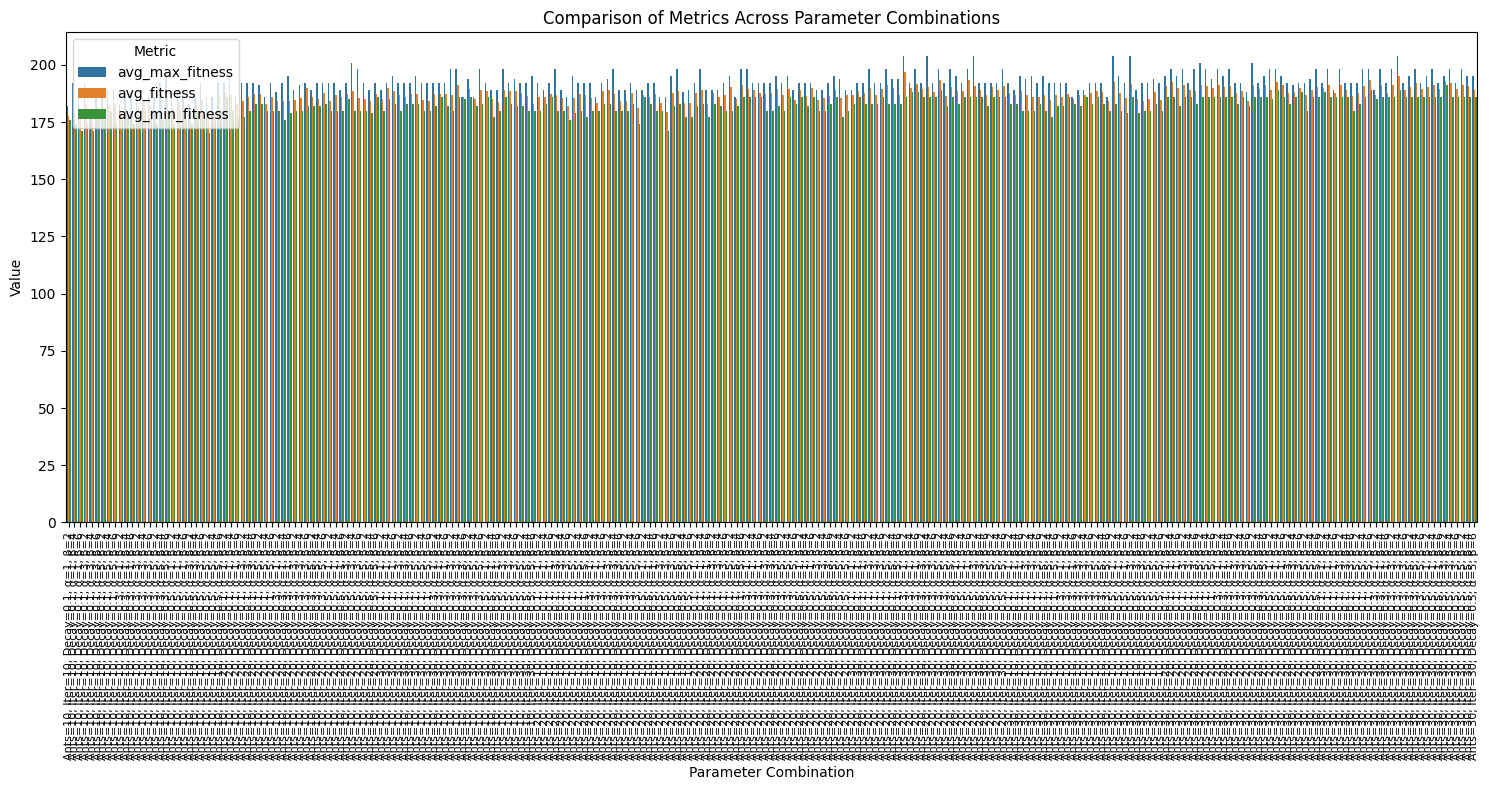

In [14]:
plt.figure(figsize=(15, 8))
sns.barplot(
    data=melted_df,
    x="combination",
    y="Value",
    hue="Metric"
)

# Adjust plot aesthetics
plt.xticks(rotation=90, fontsize=8)
plt.title("Comparison of Metrics Across Parameter Combinations")
plt.xlabel("Parameter Combination")
plt.ylabel("Value")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


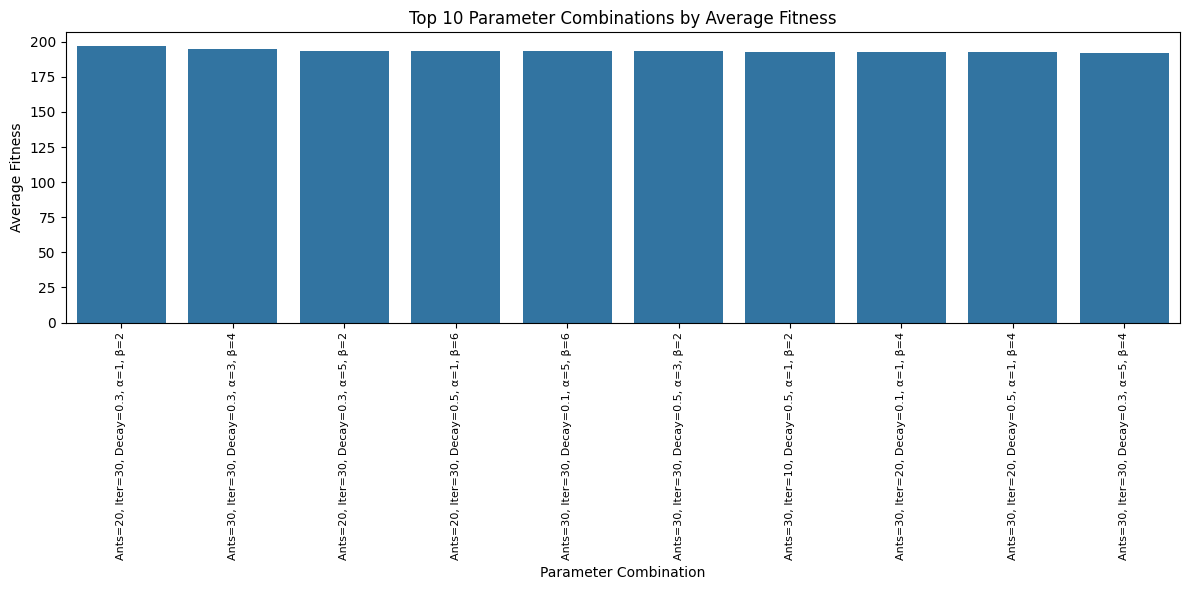

In [17]:
top_combinations = results_df.nlargest(10, "avg_fitness")

# Bar plot of the top 10 combinations
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_combinations,
    x="combination",
    y="avg_fitness"
)
plt.xticks(rotation=90, fontsize=8)
plt.title("Top 10 Parameter Combinations by Average Fitness")
plt.xlabel("Parameter Combination")
plt.ylabel("Average Fitness")
plt.tight_layout()
plt.show()

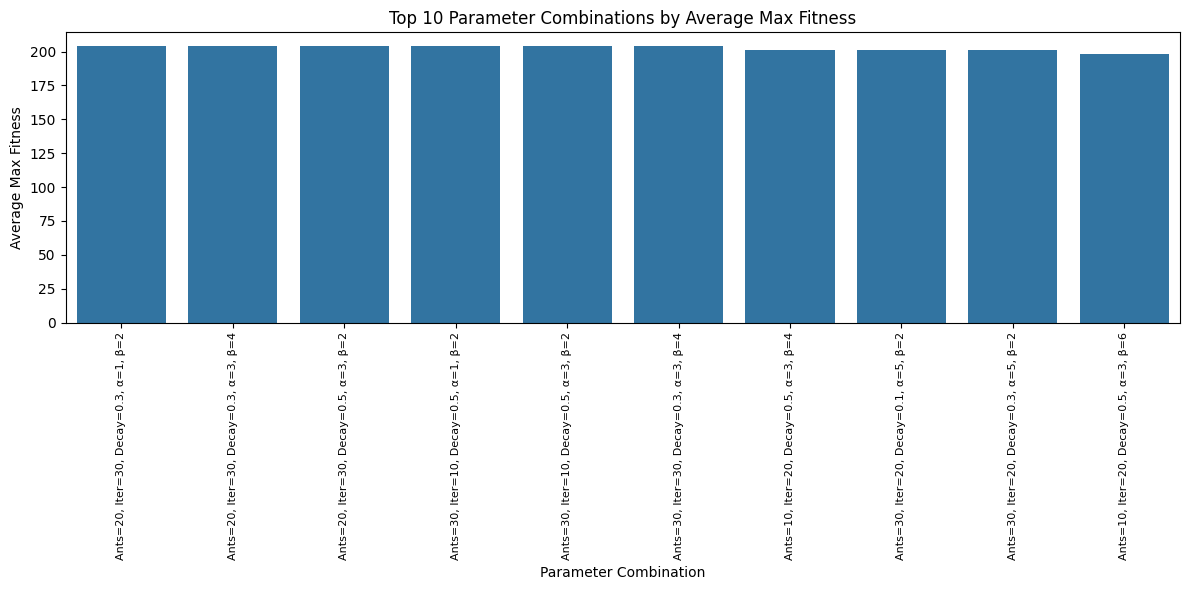

In [18]:
top_max_combinations = results_df.nlargest(10, "avg_max_fitness")

# Bar plot of the top 10 combinations
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_max_combinations,
    x="combination",
    y="avg_max_fitness"
)
plt.xticks(rotation=90, fontsize=8)
plt.title("Top 10 Parameter Combinations by Average Max Fitness")
plt.xlabel("Parameter Combination")
plt.ylabel("Average Max Fitness")
plt.tight_layout()
plt.show()

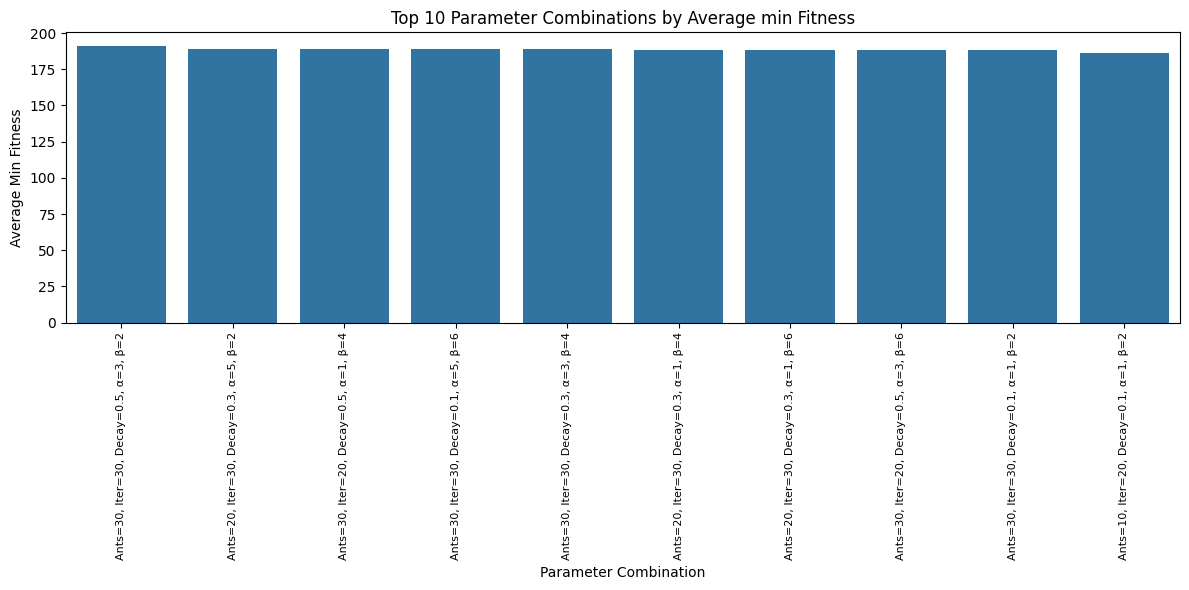

In [19]:
top_min_combinations = results_df.nlargest(10, "avg_min_fitness")

# Bar plot of the top 10 combinations
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_min_combinations,
    x="combination",
    y="avg_min_fitness"
)
plt.xticks(rotation=90, fontsize=8)
plt.title("Top 10 Parameter Combinations by Average min Fitness")
plt.xlabel("Parameter Combination")
plt.ylabel("Average Min Fitness")
plt.tight_layout()
plt.show()

In [30]:
filtered_df = results_df[results_df["num_ants"] == 10]

In [31]:
filtered_df["combination"] = filtered_df.apply(
    lambda row: f"Iter:{row['num_iterations']}_Decay:{row['pheromone_decay']}_Alpha:{row['alpha']}_Beta:{row['beta']}",
    axis=1
)

# Sort for better visualization
filtered_df = filtered_df.sort_values(by=["num_iterations", "pheromone_decay", "alpha", "beta"])

/var/folders/rd/jfxc79756t9g0g5f4ytyb6l40000gn/T/ipykernel_2858/238849037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["combination"] = filtered_df.apply(


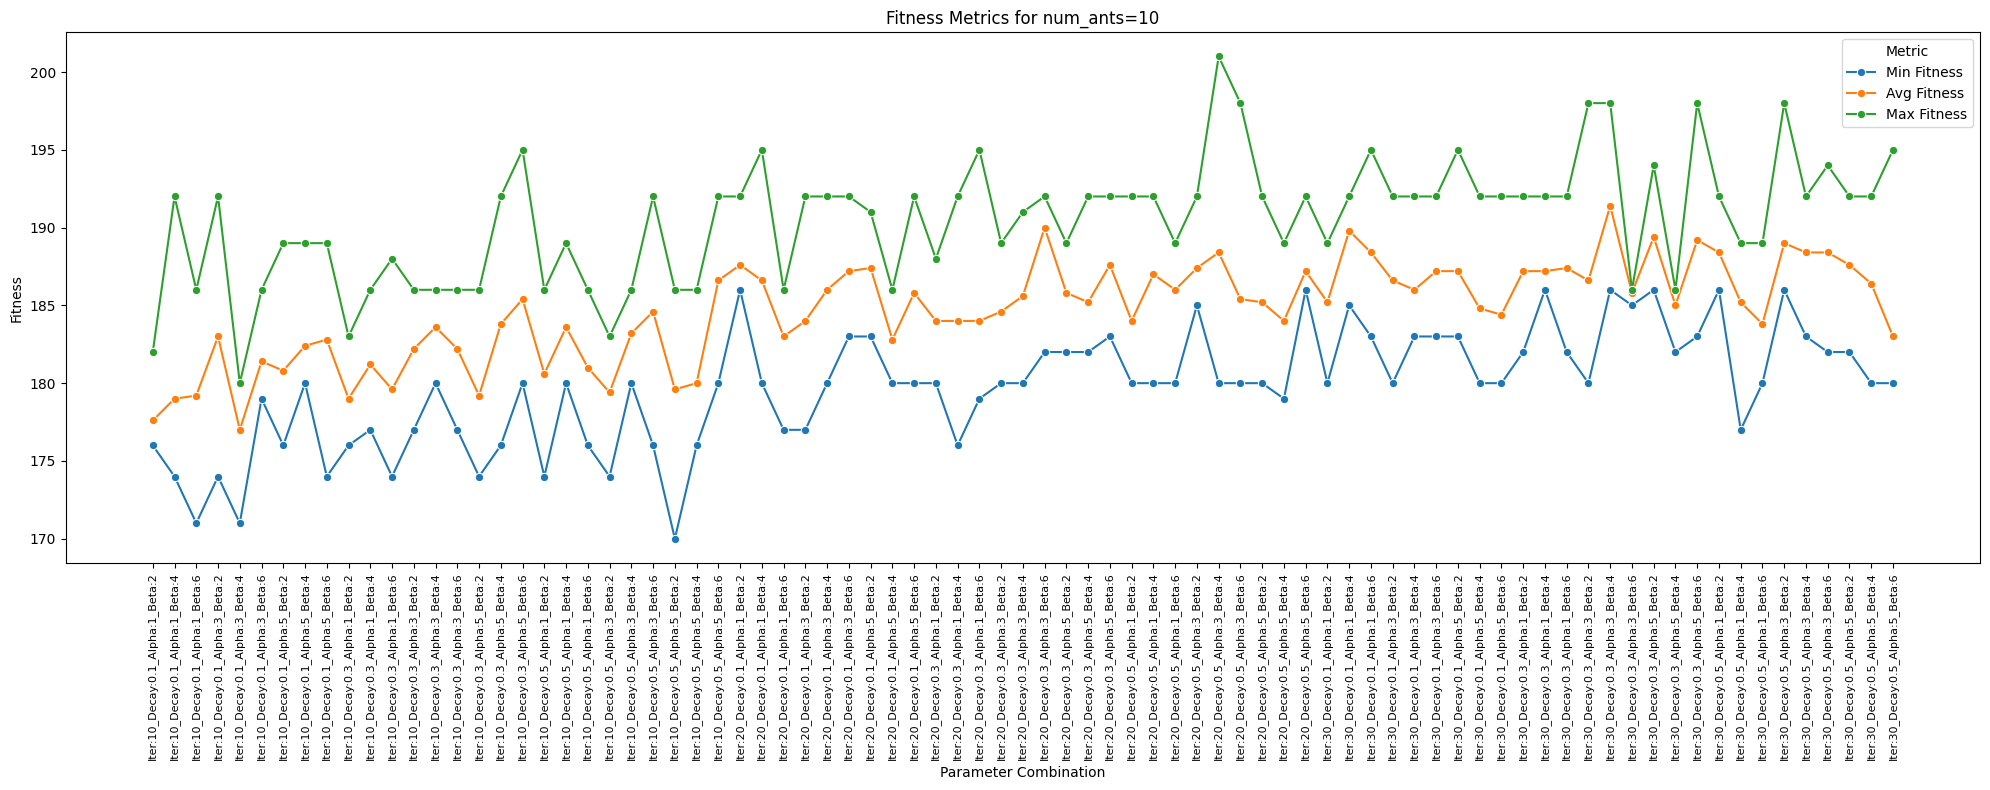

In [32]:
plt.figure(figsize=(20, 8))
sns.lineplot(
    data=filtered_df,
    x="combination",
    y="avg_min_fitness",
    label="Min Fitness",
    marker="o"
)
sns.lineplot(
    data=filtered_df,
    x="combination",
    y="avg_fitness",
    label="Avg Fitness",
    marker="o"
)
sns.lineplot(
    data=filtered_df,
    x="combination",
    y="avg_max_fitness",
    label="Max Fitness",
    marker="o"
)
plt.xticks(rotation=90, fontsize=8)
plt.title("Fitness Metrics for num_ants=10")
plt.xlabel("Parameter Combination")
plt.ylabel("Fitness")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

In [33]:
filtered_df_20 = results_df[results_df["num_ants"] == 20]

In [34]:
filtered_df_20["combination"] = filtered_df_20.apply(
    lambda row: f"Iter:{row['num_iterations']}_Decay:{row['pheromone_decay']}_Alpha:{row['alpha']}_Beta:{row['beta']}",
    axis=1
)

# Sort for better visualization
filtered_df_20 = filtered_df_20.sort_values(by=["num_iterations", "pheromone_decay", "alpha", "beta"])

/var/folders/rd/jfxc79756t9g0g5f4ytyb6l40000gn/T/ipykernel_2858/318837429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_20["combination"] = filtered_df_20.apply(


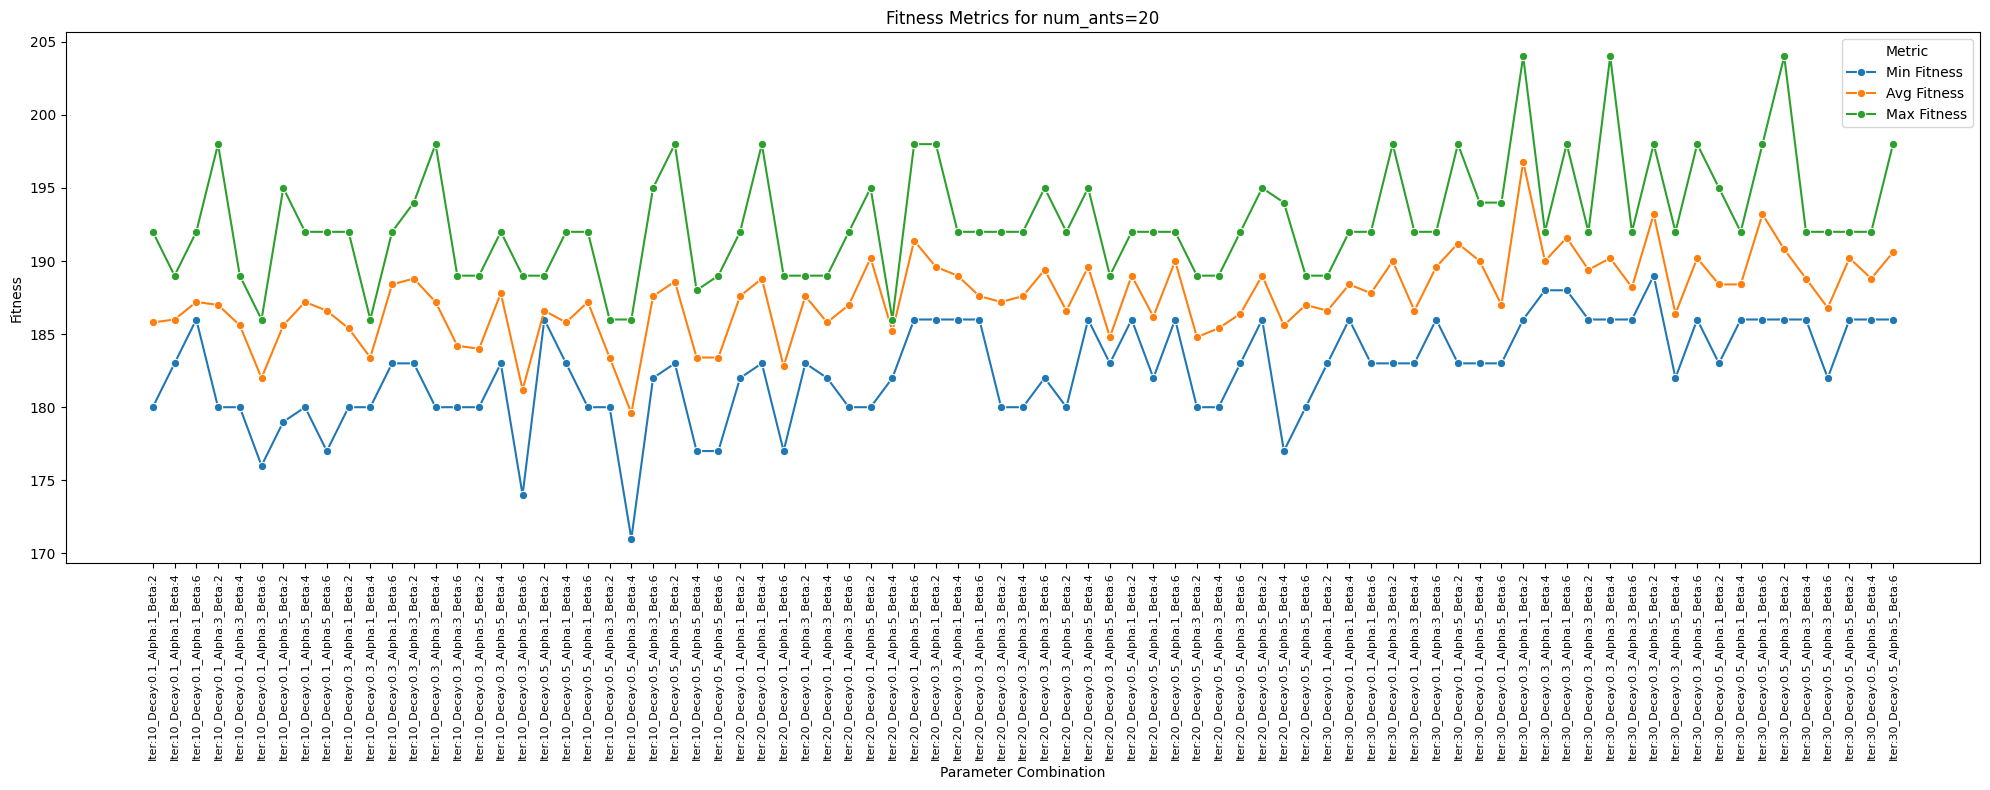

In [35]:
plt.figure(figsize=(20, 8))
sns.lineplot(
    data=filtered_df_20,
    x="combination",
    y="avg_min_fitness",
    label="Min Fitness",
    marker="o"
)
sns.lineplot(
    data=filtered_df_20,
    x="combination",
    y="avg_fitness",
    label="Avg Fitness",
    marker="o"
)
sns.lineplot(
    data=filtered_df_20,
    x="combination",
    y="avg_max_fitness",
    label="Max Fitness",
    marker="o"
)
plt.xticks(rotation=90, fontsize=8)
plt.title("Fitness Metrics for num_ants=20")
plt.xlabel("Parameter Combination")
plt.ylabel("Fitness")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

In [36]:
filtered_df_30 = results_df[results_df["num_ants"] == 30]

In [37]:
filtered_df_30["combination"] = filtered_df_30.apply(
    lambda row: f"Iter:{row['num_iterations']}_Decay:{row['pheromone_decay']}_Alpha:{row['alpha']}_Beta:{row['beta']}",
    axis=1
)

# Sort for better visualization
filtered_df_30 = filtered_df_30.sort_values(by=["num_iterations", "pheromone_decay", "alpha", "beta"])

/var/folders/rd/jfxc79756t9g0g5f4ytyb6l40000gn/T/ipykernel_2858/3194623882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_30["combination"] = filtered_df_30.apply(


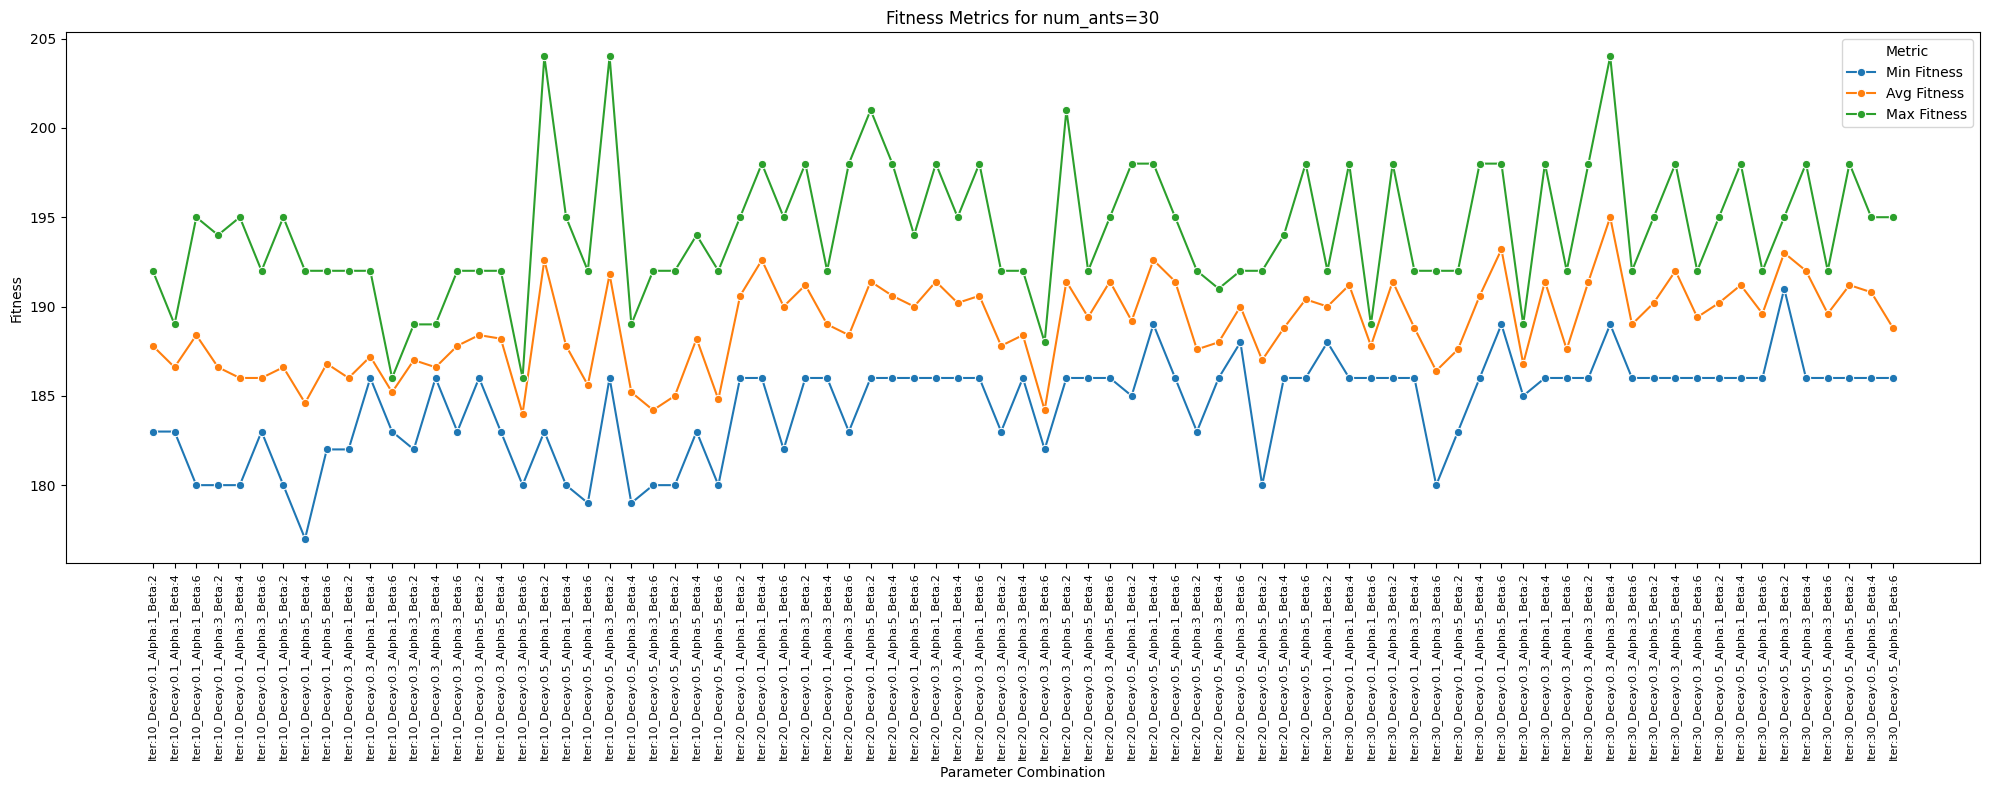

In [38]:
plt.figure(figsize=(20, 8))
sns.lineplot(
    data=filtered_df_30,
    x="combination",
    y="avg_min_fitness",
    label="Min Fitness",
    marker="o"
)
sns.lineplot(
    data=filtered_df_30,
    x="combination",
    y="avg_fitness",
    label="Avg Fitness",
    marker="o"
)
sns.lineplot(
    data=filtered_df_30,
    x="combination",
    y="avg_max_fitness",
    label="Max Fitness",
    marker="o"
)
plt.xticks(rotation=90, fontsize=8)
plt.title("Fitness Metrics for num_ants=30")
plt.xlabel("Parameter Combination")
plt.ylabel("Fitness")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [43]:
grouped_params = results_df.groupby(['num_ants', 'pheromone_decay', 'alpha', 'beta', 'num_iterations']).agg({
    'avg_fitness': 'mean',
    'avg_max_fitness': 'mean',
    'avg_min_fitness': 'mean'
}).reset_index()

print(grouped_params)

     num_ants  pheromone_decay  alpha  beta  num_iterations  avg_fitness  \
0          10              0.1      1     2              10        177.6   
1          10              0.1      1     2              20        187.6   
2          10              0.1      1     2              30        185.2   
3          10              0.1      1     4              10        179.0   
4          10              0.1      1     4              20        186.6   
..        ...              ...    ...   ...             ...          ...   
238        30              0.5      5     4              20        188.8   
239        30              0.5      5     4              30        190.8   
240        30              0.5      5     6              10        184.8   
241        30              0.5      5     6              20        190.4   
242        30              0.5      5     6              30        188.8   

     avg_max_fitness  avg_min_fitness  
0              182.0            176.0  
1      

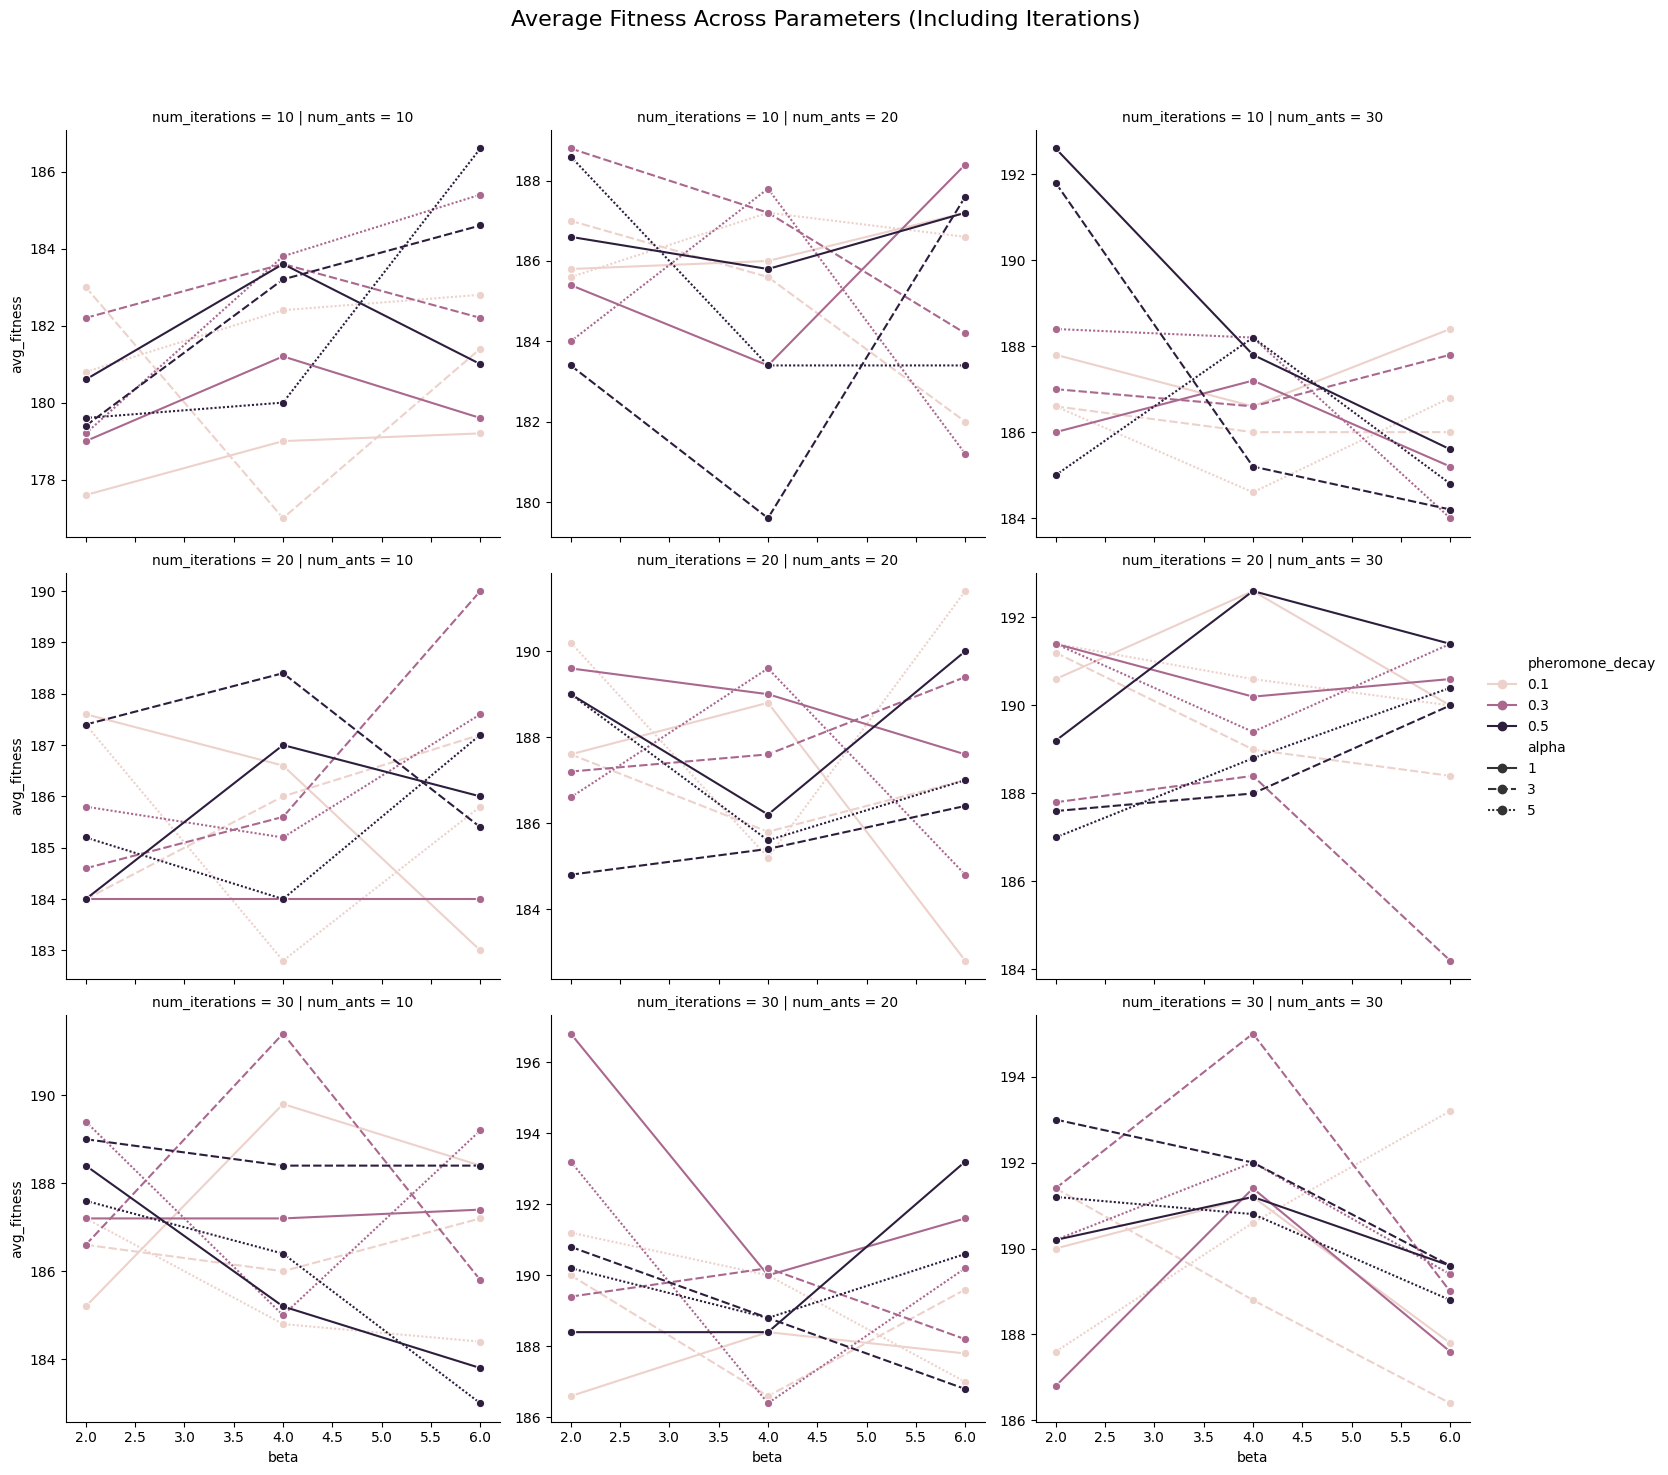

In [47]:
sns.relplot(
    data=grouped_params,
    x="beta", y="avg_fitness",
    col="num_ants", row="num_iterations",
    kind="line", hue="pheromone_decay", style="alpha", marker="o", facet_kws={'sharey': False}
)
plt.subplots_adjust(top=0.9)
plt.suptitle("Average Fitness Across Parameters (Including Iterations)", fontsize=16)
plt.show()

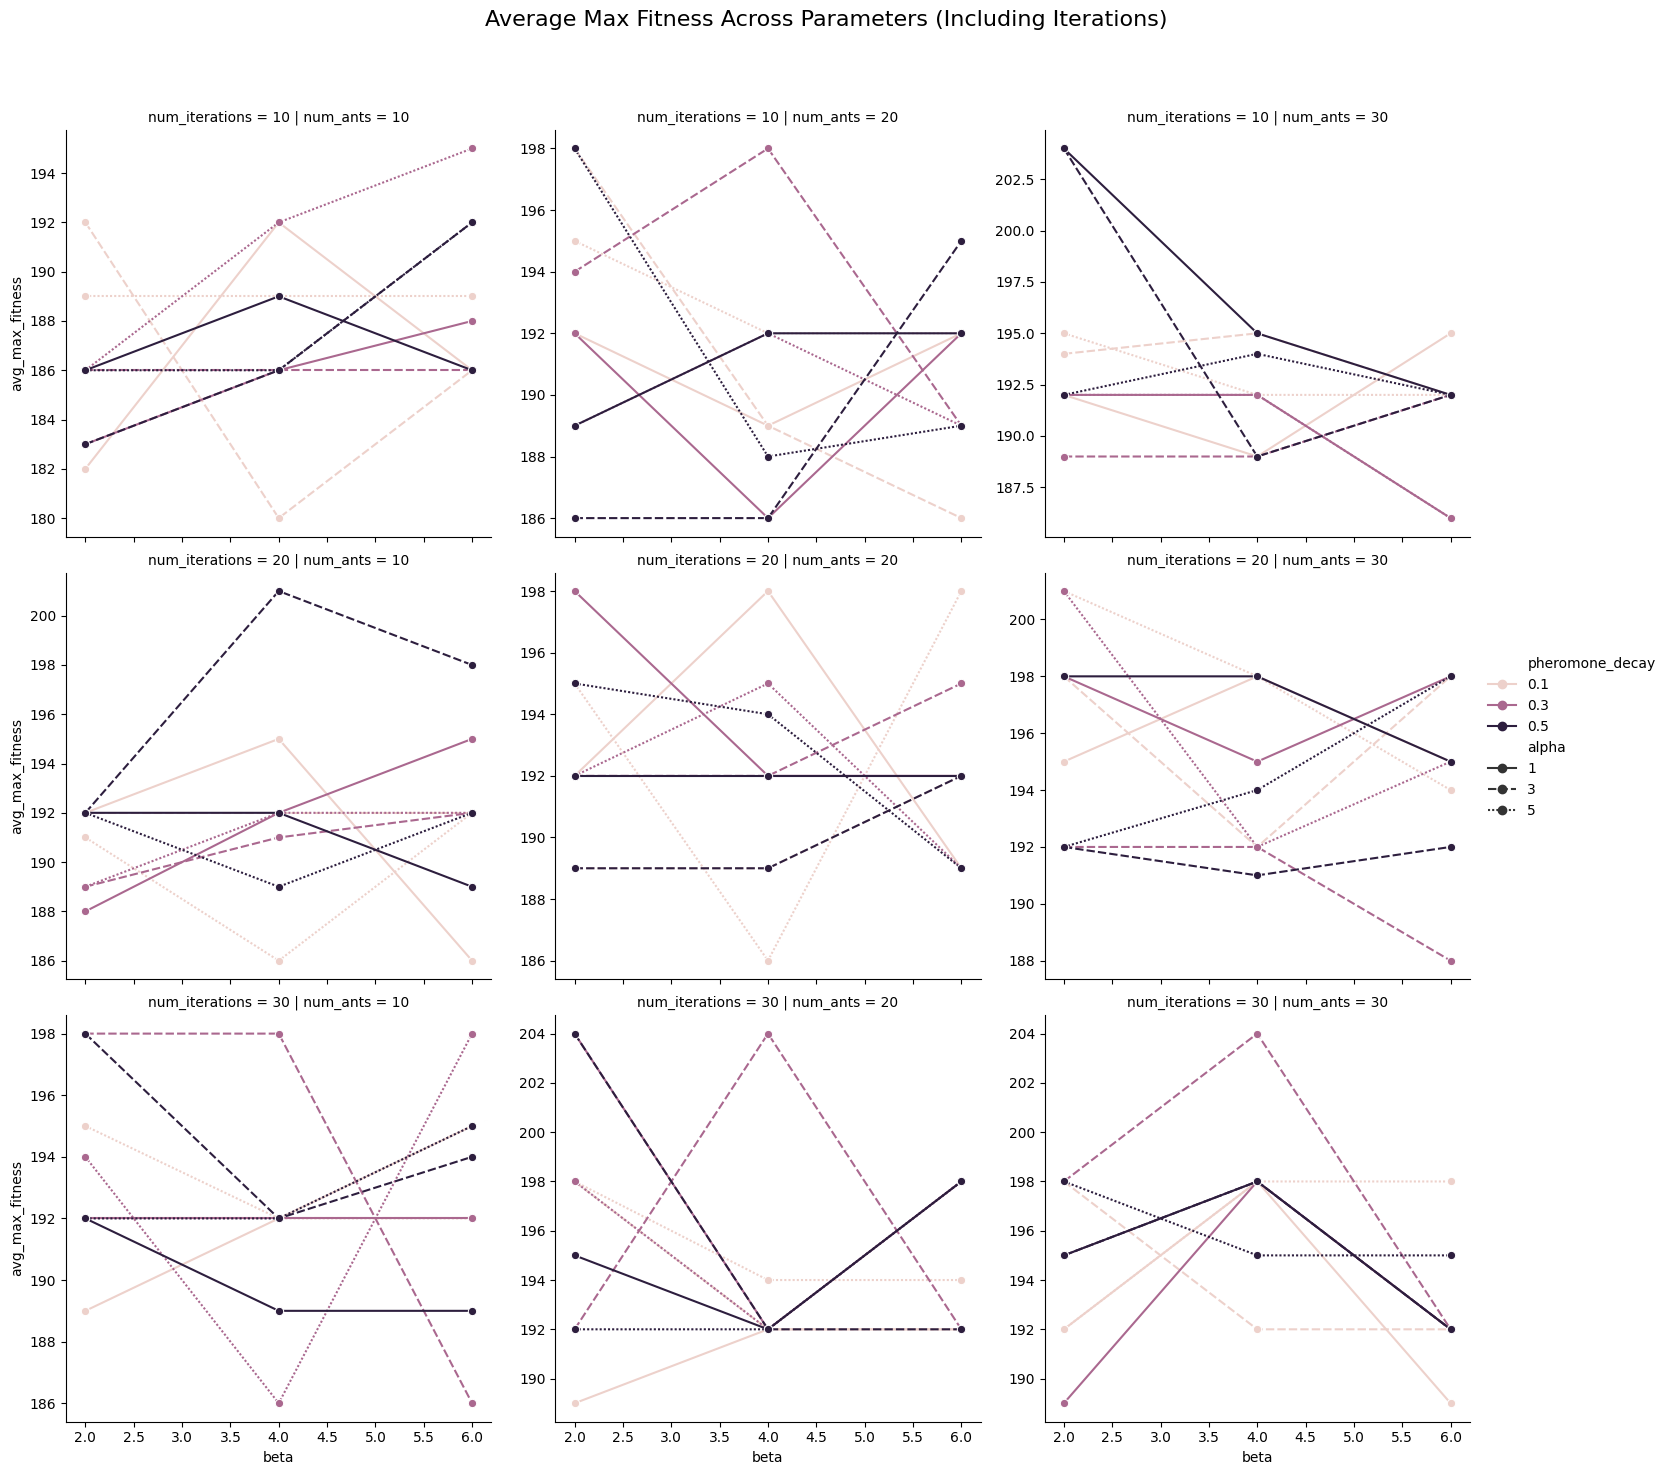

In [50]:
sns.relplot(
    data=grouped_params,
    x="beta", y="avg_max_fitness",
    col="num_ants", row="num_iterations",
    kind="line", hue="pheromone_decay", style="alpha", marker="o", facet_kws={'sharey': False}
)
plt.subplots_adjust(top=0.9)
plt.suptitle("Average Max Fitness Across Parameters (Including Iterations)", fontsize=16)
plt.show()

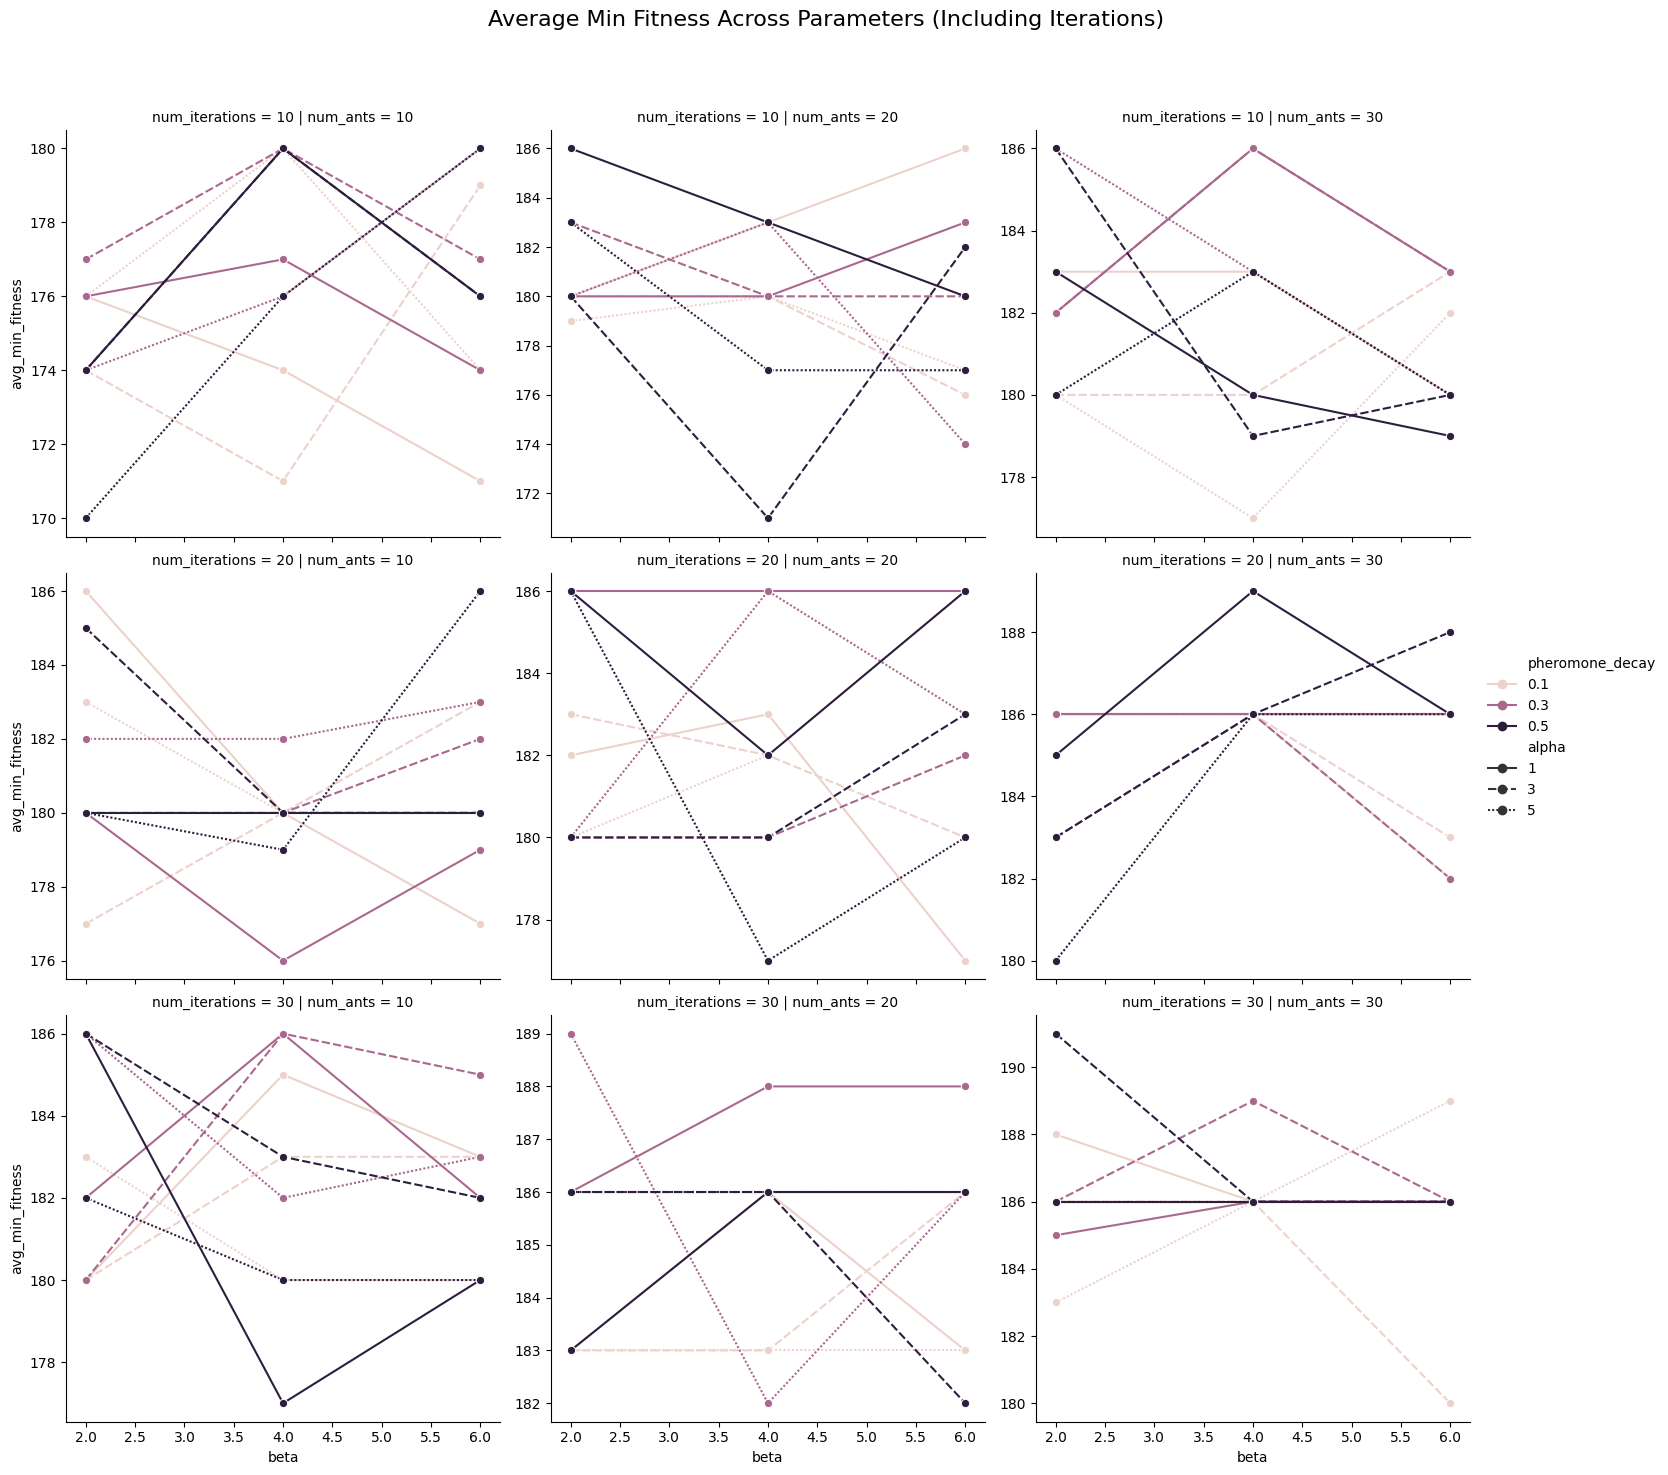

In [51]:
sns.relplot(
    data=grouped_params,
    x="beta", y="avg_min_fitness",
    col="num_ants", row="num_iterations",
    kind="line", hue="pheromone_decay", style="alpha", marker="o", facet_kws={'sharey': False}
)
plt.subplots_adjust(top=0.9)
plt.suptitle("Average Min Fitness Across Parameters (Including Iterations)", fontsize=16)
plt.show()